In [36]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import numpy as np
from datetime import datetime
from textblob import TextBlob

In [2]:
df = pd.read_csv('enron_email/emails_2000.csv')



In [3]:
df['message'][4]

"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45.  "

In [4]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to', 'subject', 'date', 'x-from', 'x-to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    print(emails[0])
    bodies = []
    tos = []
    froms = []
    subjects = []
    dates = []
    xfroms = []
    xtos = []
    for email in emails:
        froms.append(email['from'])
        tos.append(email.get('to', None))
        bodies.append(email['body'])
        subjects.append(email.get('subject', None))
        dates.append(email.get('date', None))
        xfroms.append(email.get('x-from', None))
        xtos.append(email.get('x-to', None))
    return {
        'body': bodies, 
        'to': tos, 
        'from_': froms,
        'subject': subjects,
        'date': dates,
        'xfroms': xfroms,
        'xtos': xtos
    }

In [5]:
email_df = pd.DataFrame(parse_into_emails(df.message))


{'date': 'Mon, 14 May 2001 16', 'from': 'phillip.allen@enron.com', 'to': 'tim.belden@enron.com', 'subject': '', 'x-from': 'Phillip K Allen', 'x-to': 'Tim Belden <Tim Belden/Enron@EnronXGate>', 'body': 'Here is our forecast'}


In [6]:
email_df

,body,to,from_,subject,date,xfroms,xtos
0,Here is our forecast,tim.belden@enron.com,phillip.allen@enron.com,,"Mon, 14 May 2001 16",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,Traveling to have a business meeting takes the...,john.lavorato@enron.com,phillip.allen@enron.com,Re,"Fri, 4 May 2001 13",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,test successful. way to go!!!,leah.arsdall@enron.com,phillip.allen@enron.com,Re,"Wed, 18 Oct 2000 03",Phillip K Allen,Leah Van Arsdall
3,"Randy,Can you send me a schedule of the salary...",randall.gay@enron.com,phillip.allen@enron.com,,"Mon, 23 Oct 2000 06",Phillip K Allen,Randall L Gay
4,,greg.piper@enron.com,phillip.allen@enron.com,Re,"Thu, 31 Aug 2000 05",Phillip K Allen,Greg Piper
...,...,...,...,...,...,...,...
1995,"Hunter,Are you watching Alberto? Do you have ...",hunter.shively@enron.com,phillip.allen@enron.com,,"Sat, 5 Aug 2000 09",Phillip K Allen,Hunter S Shively
1996,"jane.tholt@enron.com, steven.south@enron.com--...","John J Lavorato/Corp/Enron@Enron, Phillip K Al...",phillip.allen@enron.com,Gas fundamentals development website,"Mon, 7 Aug 2000 00",Phillip K Allen,"Mike Grigsby, Keith Holst, Frank Ermis, Jane M..."
1997,---------------------- Forwarded by Phillip K ...,"Phillip K Allen/HOU/ECT@ECT, Keith Holst/HOU/E...",phillip.allen@enron.com,New Socal Curves,"Mon, 7 Aug 2000 05",Phillip K Allen,matt.smith@enron.com
1998,"Ina,I keep getting these security requests tha...",phillip.k.allen@enron.com,phillip.allen@enron.com,Request Submitted,"Tue, 8 Aug 2000 09",Phillip K Allen,Ina Rangel


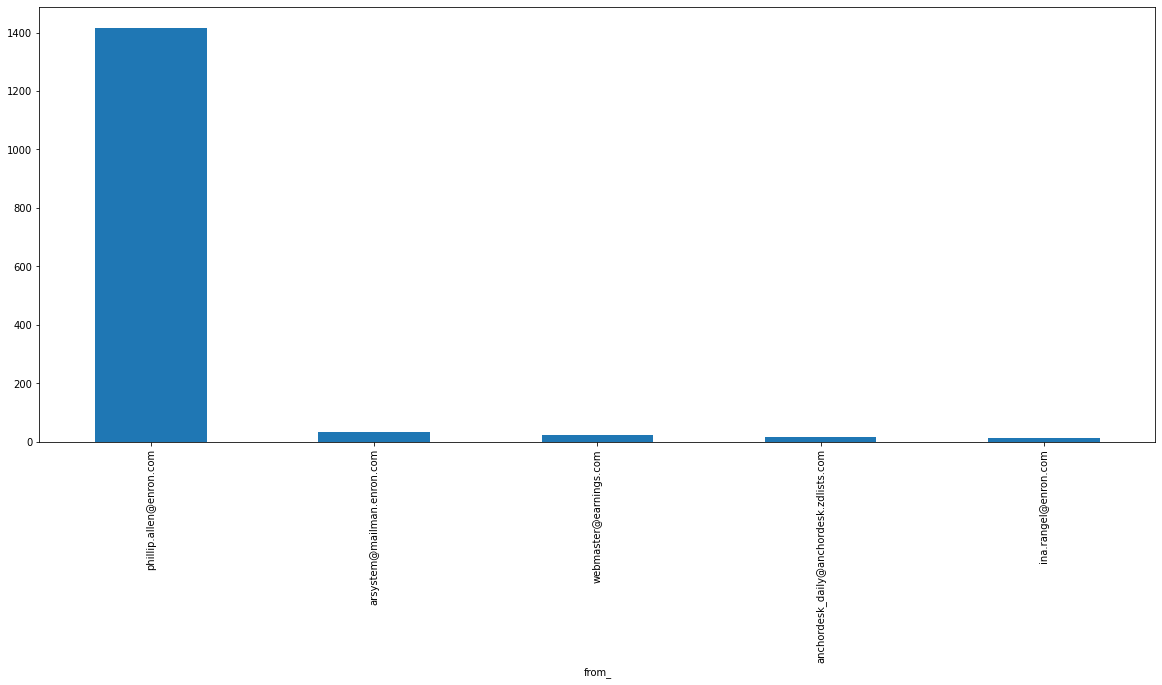

In [31]:
largest_emails = email_df.groupby('from_').size().nlargest(5).plot.bar()

In [8]:
largest_emails.tolist()

[1445, 33, 28, 23, 18]

In [9]:
tos = email_df['to'].tolist()

to_freq = {}
for to in tos:
    to_freq[to] = to_freq.get(to, 0) + 1


In [10]:
for key, val in largest_emails.to_dict().items():
    print(to_freq.get(key, 0))

4
0
0
0
0


In [11]:
# from datetime import datetime

datetime_object = datetime.strptime('Thu, 31 Aug 2000 05', '%a, %d %b %Y %H')
print(datetime_object)

2000-08-31 05:00:00


In [12]:
def parse_date(row):
    date_str = row['date']
    try:
        datetime_object = datetime.strptime(date_str, '%a, %d %b %Y %H')
    except:
        return None
    return datetime_object

In [13]:
email_df['date_converted'] = email_df.apply(parse_date, axis = 1)




In [14]:
email_df.dropna(inplace =True)

In [15]:
email_df['date_converted']

0      2001-05-14 16:00:00
1      2001-05-04 13:00:00
2      2000-10-18 03:00:00
3      2000-10-23 06:00:00
4      2000-08-31 05:00:00
               ...        
1995   2000-08-05 09:00:00
1996   2000-08-07 00:00:00
1997   2000-08-07 05:00:00
1998   2000-08-08 09:00:00
1999   2000-08-08 09:00:00
Name: date_converted, Length: 1936, dtype: datetime64[ns]

In [16]:
# email_df.groupby(email_df.date_converted.dt.day).size().plot()


<AxesSubplot:xlabel='date_converted'>

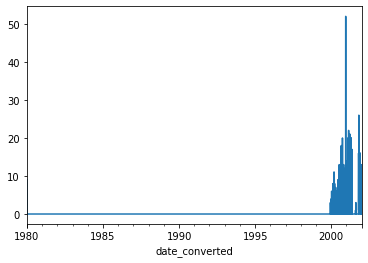

In [17]:
# email_df = email_df[100:]
plt.rcParams["figure.figsize"] = (20,8)
email_df = email_df.set_index('date_converted') 
email_df.sort_index(inplace = True)
email_df.groupby(pd.Grouper(freq='D')).size().plot()

In [18]:
email_df.index

DatetimeIndex(['1979-12-31 16:00:00', '1979-12-31 16:00:00',
               '1979-12-31 16:00:00', '1979-12-31 16:00:00',
               '1979-12-31 16:00:00', '1979-12-31 16:00:00',
               '1979-12-31 16:00:00', '1979-12-31 16:00:00',
               '1979-12-31 16:00:00', '1999-12-10 07:00:00',
               ...
               '2001-12-27 17:00:00', '2001-12-27 21:00:00',
               '2001-12-27 21:00:00', '2001-12-28 05:00:00',
               '2001-12-28 05:00:00', '2001-12-28 09:00:00',
               '2001-12-28 17:00:00', '2001-12-29 04:00:00',
               '2001-12-29 06:00:00', '2001-12-30 10:00:00'],
              dtype='datetime64[ns]', name='date_converted', length=1936, freq=None)

In [19]:
email_df['parsed_date'] = email_df.index
mask = email_df['parsed_date'] > '2000-01-01'
email_df = email_df.loc[mask]

<AxesSubplot:xlabel='date_converted'>

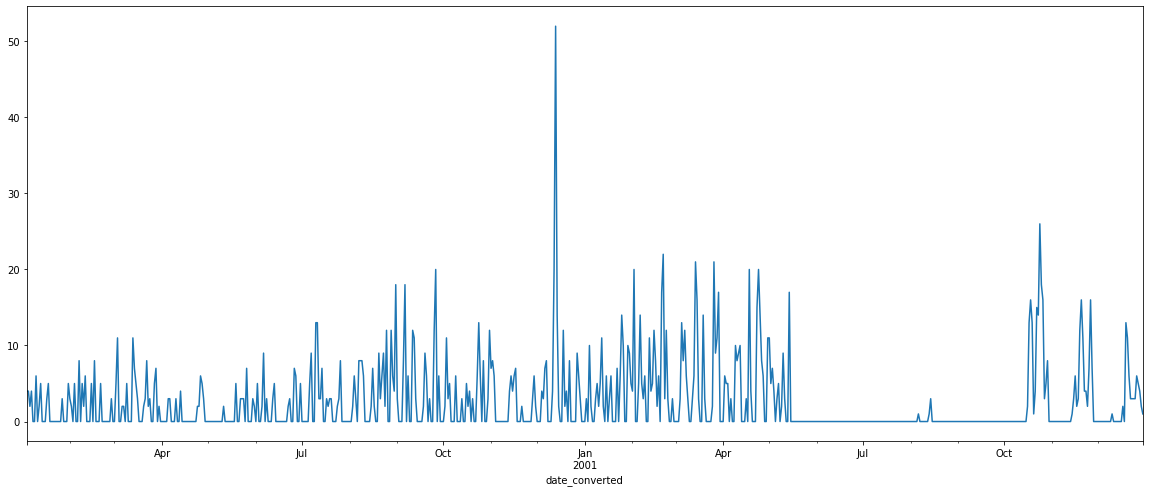

In [20]:
plt.rcParams["figure.figsize"] = (20,8)
email_df.groupby(pd.Grouper(freq='D')).size().plot()

In [21]:
print(len(email_df))

1921


In [48]:
sentiments = []
bodies = []
dates = []
for index, row in email_df.iterrows():
    body = row['body']
    bodies.append(body)
    opinion = TextBlob(body)
    pol, sent = opinion.sentiment
    if sent < 0.7:
        continue
    sentiments.append(sent)
    dates.append(row['parsed_date'])

Text(0, 0.5, 'Sentiment')

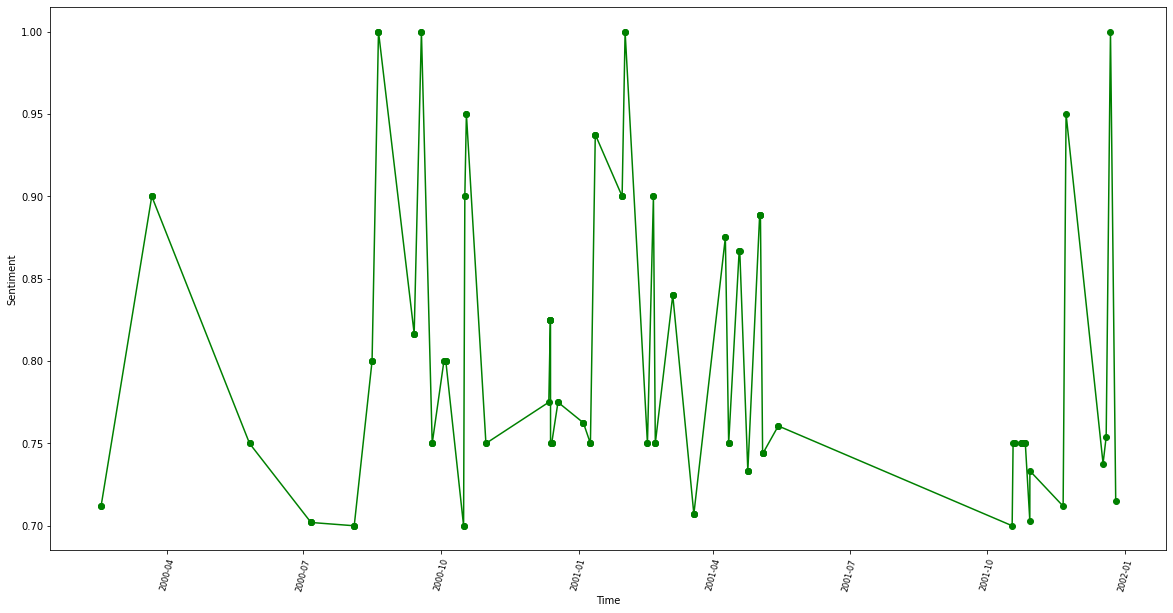

In [49]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.xticks(rotation=75, fontsize=8)
ax.plot(dates, sentiments, marker='o', color = 'green' )

plt.xlabel('Time')
plt.ylabel('Sentiment')

In [47]:
for sentiment, body, date in zip(sentiments, bodies, dates):
    if sentiment > 0.95:
        print(body)
        print()
#         break
        

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000Phillip,The a/c I bought today for #17 cost $166.71 pd by ck#14298/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00(frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308.56.FAX MACHINE FORFFICE CK # 1427=108.25 FROM sTEELMAN OFFICE PRODUCTS.                                           Thanxs, Lucy________________________________________________________________________

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000Phillip,The a/c I bought today for #17 cost $166.71 pd by ck#14298/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00(frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308.56.FAX MACHINE FORFFICE CK # 1427=108.25 FROM sTEELMAN OFFICE PRODUCTS.                                           Thanxs, Lucy__________________________________